# Open Streets : Redirecting Traffic with Predictive Modeling in NYC

## Abstract

## Introduction

In 2030, the expected population of the world will be over 8 billion and 60% of it will be located in urban areas. The rapid growth raises urban challenges of a magnitude that architects and urbanist have never dealt with before. One of the key challenges is to be able to remove cars from cities due to the expected quantity but also the impact on the environment and mobility. Although we can start to design our new cities with less car and a focus on walkability, there are plenty of existing cities such as New York that have evolved through the years to carry people with a mix of cars, taxis and mass transportation. Recent efforts have improved the mass transportation quality and opportunities for walking and biking. Nevertheless, a crisis such as COVID-19 demonstrated the need in the future for people to take over the streets to create more pedestrian focus citiesand extended storefronts that invite the community to gather.

The more complex these challenges become the harder it is to find solutions with traditional methods that dealt with different priorities. Everyday millions of traffic related observations are generated in the form of data that informs how humans "move" in cities. Technology has proven to benefit our society and for challenges of this magnitude a creative and innovative method is imperative to foresee and solve for the future urban density.

Using open data available from NYC, this project envisions to perform an analysis on current car traffic patterns in New York City. Based on the information from cars and taxis at different times of day, I will create a model as accurate as possible to predict how traffic may be redirected with certain streets closed. Historically, there are commercial corridors that expand from East to West of the city that are often vibrant and full of people but based on the Comissioners Plan (1811), they are wider streets that day to day are the path to thousands of cars. The model will explore the impact of returning the street scape to pedestrians on these areas of opportunity as well as compare narrower less busy streets. The use of data analysis, visualization and predictive model will inform this project to create a creative proposal of potential pedestrian-only streets in the city of New York. 

## Research Questions

1. How can we determine the most and least traveled streets by cars, based on trip counts and car volume, that can potentially be transfered to pedestrian-only access?
2. What is the impact on traffic and mobility in New York when we close certain streets for pedestrian-only access?
3. How can we determine the optimal time of day on a monthyl basis for temporary closure of streets?

## Data to be Used

The proposed data for this scope is sourced from New York Open Data and it will combine a series of publicly available structured data sets.
1. **Traffic Volume** (2014-2019) - CSV: Traffic volume counts collected by DOT for New York Metropolitan Transportation Council (NYMTC) to validate theNew York Best Practice Model (NYBPM). [Source](https://data.cityofnewyork.us/Transportation/Traffic-Volume-Counts-2014-2019-/ertz-hr4r)
2. **NYC Street Centerline (CSCL)** - GeoJSON | CSV : The NYC Street Centerline (CSCL) is a road-bed representation of New York City streets containing address ranges and other information such as traffic directions, road types, segment types. [Source](https://data.cityofnewyork.us/City-Government/NYC-Street-Centerline-CSCL-/exjm-f27b)
3. **Yellow Taxi Trip Data (2014-2019)** - GeoJSON API and CSV - One dataset per year: This dataset includes trip records from all trips completed in yellow taxis from in NYC. [Source](https://data.cityofnewyork.us/Transportation/2015-Yellow-Taxi-Trip-Data/ba8s-jw6u)
4. **Closed Street for Pothole Work Orders** - GeoJSON |CSV: The Street Pothole Work Orders data consists of closed street potholes inspected and repaired by the New York City Department of Transportation. [Source](https://data.cityofnewyork.us/Transportation/Street-Pothole-Work-Orders-Closed-Dataset-/x9wy-ing4)
5. **New York City Truck Routes** - GeoJSON | CSV: The New York City Truck Route Network is a set of roads that commercial vehicles must use in New York City. [Source](https://data.cityofnewyork.us/Transportation/New-York-City-Truck-Routes/jjja-shxy)

In [1]:
import pandas as pd
import geopandas as gpd

#traffic volume csv
traffic=pd.read_csv('https://raw.githubusercontent.com/AlejandraZS10/capstone_project/master/Traffic_Volume_Counts__2014-2019_.csv')
traffic.head(10)

,ID,Segment ID,Roadway Name,From,To,Direction,Date,12:00-1:00 AM,1:00-2:00AM,2:00-3:00AM,...,2:00-3:00PM,3:00-4:00PM,4:00-5:00PM,5:00-6:00PM,6:00-7:00PM,7:00-8:00PM,8:00-9:00PM,9:00-10:00PM,10:00-11:00PM,11:00-12:00AM
0,2,70376,3 Avenue,East 154 Street,East 155 Street,NB,09/13/2014,204.0,177.0,133.0,...,520,611,573,546,582,528,432,328,282,240
1,2,70376,3 Avenue,East 155 Street,East 154 Street,SB,09/13/2014,140.0,51.0,128.0,...,379,376,329,362,418,335,282,247,237,191
2,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,EB,09/13/2014,94.0,73.0,65.0,...,280,272,264,236,213,190,199,183,147,103
3,56,176365,Bedford Park Boulevard,Grand Concourse,Valentine Avenue,WB,09/13/2014,88.0,82.0,75.0,...,237,276,223,240,217,198,186,162,157,103
4,62,147673,Broadway,West 242 Street,240 Street,SB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324
5,62,158447,Broadway,West 242 Street,240 Street,NB,09/13/2014,255.0,209.0,149.0,...,732,809,707,675,641,556,546,465,425,324
6,62,255653,Broadway,West 242 Street,240 Street,SB,09/13/2014,87.0,86.0,78.0,...,200,200,209,175,181,167,144,129,112,103
7,71,139620,Bronx River Parkway,Bronx River,East Gun Hill Road,NB,09/13/2014,802.0,445.0,388.0,...,2933,2904,2699,2877,2947,2532,2193,1820,1677,1331
8,71,139618,Bronx River Parkway,East Gun Hill Road,Bronx River,SB,09/13/2014,618.0,345.0,309.0,...,2676,2848,2680,2581,2274,2054,1762,1534,1308,1107
9,76,70364,Brook Avenue,East 152 Street,East 153 Street,SB,09/13/2014,79.0,58.0,41.0,...,288,300,301,305,294,222,183,134,129,97


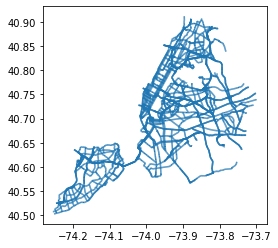

In [7]:
#truck routes
truck_routes = gpd.read_file('New York City Truck Routes.geojson')
truck_routes.head(10)

truck_routes.plot()

## Approach

## Exploratory Data Analysis

## Data Preparation and Review